In [1]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt

In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0
...,...,...,...,...,...,...,...,...,...,...
44000,35,UNI,Unicaja,2021-03-24,0.802000,0.822000,0.786500,0.819500,0.751219,2616012
44001,35,UNI,Unicaja,2021-03-23,0.770000,0.807500,0.762500,0.802500,0.735636,2436213
44002,35,UNI,Unicaja,2021-03-22,0.780000,0.780500,0.760000,0.764000,0.700343,1420069
44003,35,UNI,Unicaja,2021-03-30,0.867000,0.878500,0.855500,0.877500,0.804387,3028721


In [3]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

acerinox = df[df['empresa'] == 'Acerinox']

acerinox.shape

(1325, 10)

In [4]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

acerinox = acerinox [['date','open','high','low','close','adj close']]

acerinox.shape

(1325, 6)

In [5]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

acerinox['date'] = pd.to_datetime(acerinox['date'], format="%Y-%m-%d")

acerinox.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 2000 to 3324
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [6]:
# Paso 5: Ordenar el DF por fecha

acerinox.sort_values(by='date',ascending= True, inplace=True)

acerinox.head()

,date,open,high,low,close,adj close
2435,2019-01-02,8.640,8.642,8.350,8.582,5.994900
2436,2019-01-03,8.526,8.576,8.402,8.406,5.871956
2437,2019-01-04,8.516,8.898,8.510,8.882,6.204463
2438,2019-01-07,8.994,9.054,8.776,8.976,6.270126
2439,2019-01-08,8.968,9.340,8.968,9.200,6.426599


In [7]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

acerinox = acerinox[(acerinox['date'] >= fecha_inicio) & (acerinox['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

acerinox.shape

(812, 6)

In [8]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=acerinox['date'].min(), end=acerinox['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

acerinox = acerinox.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

acerinox = acerinox.rename(columns={'index': 'date'})

In [9]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

acerinox.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,9.180,9.432,9.142,9.294,7.683368
1,2021-01-05,9.310,9.334,9.214,9.312,7.698248
2,2021-01-06,9.334,9.546,9.304,9.538,7.885085
3,2021-01-07,9.590,9.840,9.550,9.820,8.118213
4,2021-01-08,9.900,9.900,9.670,9.712,8.028930
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,9.714,9.780,9.588,9.704,8.022317
8,2021-01-12,9.770,9.816,9.694,9.780,8.085144
9,2021-01-13,9.850,9.980,9.768,9.814,8.113254


In [10]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

acerinox = acerinox.fillna(method='ffill')

In [11]:
# Paso 10: Comprobar que se han introducido los valores correctamente


acerinox.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,9.180,9.432,9.142,9.294,7.683368
1,2021-01-05,9.310,9.334,9.214,9.312,7.698248
2,2021-01-06,9.334,9.546,9.304,9.538,7.885085
3,2021-01-07,9.590,9.840,9.550,9.820,8.118213
4,2021-01-08,9.900,9.900,9.670,9.712,8.028930
5,2021-01-09,9.900,9.900,9.670,9.712,8.028930
6,2021-01-10,9.900,9.900,9.670,9.712,8.028930
7,2021-01-11,9.714,9.780,9.588,9.704,8.022317
8,2021-01-12,9.770,9.816,9.694,9.780,8.085144
9,2021-01-13,9.850,9.980,9.768,9.814,8.113254


In [12]:
# Paso 11: Establecer columna 'date' como índice para modelo

acerinox = acerinox.set_index('date')

acerinox.head(10)

,open,high,low,close,adj close
date,,,,,
2021-01-04,9.180,9.432,9.142,9.294,7.683368
2021-01-05,9.310,9.334,9.214,9.312,7.698248
2021-01-06,9.334,9.546,9.304,9.538,7.885085
2021-01-07,9.590,9.840,9.550,9.820,8.118213
2021-01-08,9.900,9.900,9.670,9.712,8.028930
2021-01-09,9.900,9.900,9.670,9.712,8.028930
2021-01-10,9.900,9.900,9.670,9.712,8.028930
2021-01-11,9.714,9.780,9.588,9.704,8.022317
2021-01-12,9.770,9.816,9.694,9.780,8.085144


In [13]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

acerinox.index = pd.DatetimeIndex(acerinox.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

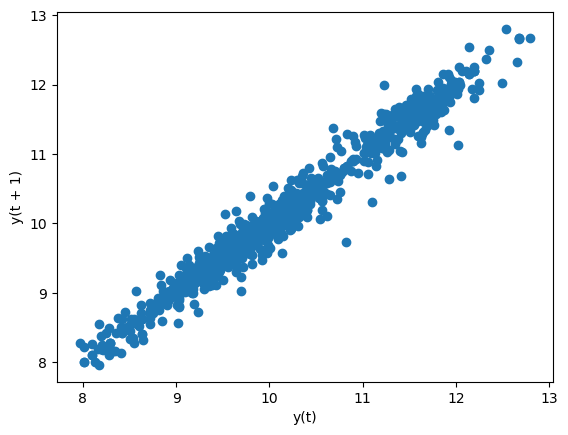

In [14]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

from pandas.plotting import lag_plot

lag_plot(acerinox.close)

In [15]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [16]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = acerinox.close[:-10], acerinox.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [17]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [18]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(acerinox.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    10.160358
2024-02-22    10.160712
2024-02-23    10.161061
2024-02-24    10.161405
2024-02-25    10.161744
2024-02-26    10.162079
2024-02-27    10.162410
2024-02-28    10.162736
2024-02-29    10.163057
2024-03-01    10.163375
Freq: D, dtype: float64

In [19]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    10.285
2024-02-22    10.360
2024-02-23    10.260
2024-02-24    10.260
2024-02-25    10.260
2024-02-26    10.230
2024-02-27    10.400
2024-02-28    10.200
2024-02-29    10.135
2024-03-01     9.574
Freq: D, Name: close, dtype: float64

In [20]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

0.15799270053171685

In [21]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,10.285,10.160358,-0.124642
2024-02-22,10.360,10.160712,-0.199288
2024-02-23,10.260,10.161061,-0.098939
2024-02-24,10.260,10.161405,-0.098595
2024-02-25,10.260,10.161744,-0.098256
2024-02-26,10.230,10.162079,-0.067921
2024-02-27,10.400,10.162410,-0.237590
2024-02-28,10.200,10.162736,-0.037264
2024-02-29,10.135,10.163057,0.028057
2024-03-01,9.574,10.163375,0.589375
